#Amazon Review

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')


### Data Dictionary
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B  
asin - ID of the product, e.g. 0000013714            
reviewerName - name of the reviewer                  
helpful - helpfulness rating of the review, e.g. 2/3                     
reviewText - text of the review                      
overall - rating of the product                      
summary - summary of the review                      
unixReviewTime - time of the review (unix time)      
reviewTime - time of the review (raw)                



### Import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
beauty= pd.read_json('/content/drive/MyDrive/Colab Notebooks/Beauty_5.json', lines=True, orient='records')
beauty.head(1)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1,Don't waste your money,1391040000,"01 30, 2014"


In [ ]:
csaj=pd.read_json('/content/drive/MyDrive/Colab Notebooks/Clothing_Shoes_and_Jewelry_5.json', lines=True, orient='records')
csaj.head(1)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5,Great tutu- not cheaply made,1297468800,"02 12, 2011"


Ratings only: These datasets include no metadata or reviews, but only (user,item,rating,timestamp)

### Import CSV

In [ ]:
beauty_r=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ratings_Beauty.csv',header=None)
beauty_r.columns=['reviewerID','asin','overall','unixReviewTime']
beauty_r.head(1)

,reviewerID,asin,overall,unixReviewTime
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200


In [ ]:
csaj_r=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ratings_Clothing_Shoes_and_Jewelry.csv',header=None)
csaj_r.columns=['reviewerID','asin','overall','unixReviewTime']
csaj_r.head(1)

,reviewerID,asin,overall,unixReviewTime
0,A2XVJBSRI3SWDI,0000031887,5.0,1383523200


###Data Review

In [ ]:
beauty.info(),beauty_r.info(),csaj.info(),csaj_r.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198502 entries, 0 to 198501
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      198502 non-null  object
 1   asin            198502 non-null  object
 2   reviewerName    197116 non-null  object
 3   helpful         198502 non-null  object
 4   reviewText      198502 non-null  object
 5   overall         198502 non-null  int64 
 6   summary         198502 non-null  object
 7   unixReviewTime  198502 non-null  int64 
 8   reviewTime      198502 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   reviewerID      object 
 1   asin            object 
 2   overall         float64
 3   unixReviewTime  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7

(None, None, None, None)

###Data shape

In [ ]:
csaj.shape,csaj_r.shape,beauty.shape,beauty_r.shape

((278677, 9), (5748920, 4), (198502, 9), (2023070, 4))

### Null Value

In [ ]:
beauty.isnull().sum(),beauty_r.isnull().sum(),csaj.isnull().sum(),csaj_r.isnull().sum()

(reviewerID           0
 asin                 0
 reviewerName      1386
 helpful              0
 reviewText           0
 overall              0
 summary              0
 unixReviewTime       0
 reviewTime           0
 dtype: int64, reviewerID        0
 asin              0
 overall           0
 unixReviewTime    0
 dtype: int64, reviewerID          0
 asin                0
 reviewerName      452
 helpful             0
 reviewText          0
 overall             0
 summary             0
 unixReviewTime      0
 reviewTime          0
 dtype: int64, reviewerID        0
 asin              0
 overall           0
 unixReviewTime    0
 dtype: int64)

###Correcting Datatype (Type Casting)

In [ ]:
beauty['ReviewDate']=pd.to_datetime(beauty.unixReviewTime,unit='s')
beauty_r['ReviewDate']=pd.to_datetime(beauty_r.unixReviewTime,unit='s')
csaj['ReviewDate']=pd.to_datetime(csaj.unixReviewTime,unit='s')
csaj_r['ReviewDate']=pd.to_datetime(csaj_r.unixReviewTime,unit='s')

### Null Value Treatment

In [ ]:
beauty.drop(['reviewerName','unixReviewTime','reviewTime'],axis=1,inplace=True)
beauty_r.drop(['unixReviewTime'],axis=1,inplace=True)
csaj.drop(['reviewerName','unixReviewTime','reviewTime'],axis=1,inplace=True)
csaj_r.drop(['unixReviewTime'],axis=1,inplace=True)

In [ ]:
beauty.isnull().sum(),csaj.isnull().sum()

(reviewerID    0
 asin          0
 helpful       0
 reviewText    0
 overall       0
 summary       0
 ReviewDate    0
 dtype: int64, reviewerID    0
 asin          0
 helpful       0
 reviewText    0
 overall       0
 summary       0
 ReviewDate    0
 dtype: int64)

### Feature Engineering

In [ ]:
temp=pd.DataFrame(beauty['helpful'].to_list(),columns=['helpfulN','helpfulD'])
beauty['helpful']=(temp['helpfulN']/temp['helpfulD'])*100
beauty['helpful'].fillna(0,inplace=True)
temp1=pd.DataFrame(csaj['helpful'].to_list(),columns=['helpfulN','helpfulD'])
csaj['helpful']=(temp1['helpfulN']/temp1['helpfulD'])*100
csaj['helpful'].fillna(0,inplace=True)

Droping Duplicates

In [ ]:
beauty.drop_duplicates(keep='first',inplace=True)
beauty_r.drop_duplicates(keep='first',inplace=True)
csaj.drop_duplicates(keep='first',inplace=True)
csaj_r.drop_duplicates(keep='first',inplace=True)

In [ ]:
beauty['year'] = beauty['ReviewDate'].dt.year
beauty_r['year'] = beauty_r['ReviewDate'].dt.year
csaj['year'] = csaj['ReviewDate'].dt.year
csaj_r['year'] = csaj_r['ReviewDate'].dt.year

In [ ]:

beauty['season'] = beauty['ReviewDate'].dt.quarter
beauty_r['season'] = beauty_r['ReviewDate'].dt.quarter
csaj['season'] = csaj['ReviewDate'].dt.quarter
csaj_r['season'] = csaj_r['ReviewDate'].dt.quarter

In [ ]:
beauty['month'] = beauty['ReviewDate'].dt.month
beauty_r['month'] = beauty_r['ReviewDate'].dt.month
csaj['month'] = csaj['ReviewDate'].dt.month
csaj_r['month'] = csaj_r['ReviewDate'].dt.month

In [ ]:
b=beauty.copy()
b_r=beauty_r.copy()
c=csaj.copy()
c_r=csaj_r.copy()

In [ ]:
b.loc[b["helpful"] >= 30, 'indicator'] = 'Useful'
b.loc[(b["helpful"] < 30) , 'indicator'] = 'Not Useful'
c.loc[c["helpful"] >= 30, 'indicator'] = 'Useful'
c.loc[(c["helpful"] < 30) , 'indicator'] = 'Not Useful'

In [ ]:
b.loc[b["overall"] >= 3, 'responce'] = 'Positive'
b.loc[(b["overall"] < 3) , 'responce'] = 'Negative'
b_r.loc[b_r["overall"] >= 3, 'responce'] = 'Positive'
b_r.loc[(b_r["overall"] < 3) , 'responce'] = 'Negative'
c.loc[c["overall"] >= 3, 'responce'] = 'Positive'
c.loc[(c["overall"] < 3) , 'responce'] = 'Negative'
c_r.loc[c_r["overall"] >= 3, 'responce'] = 'Positive'
c_r.loc[(c_r["overall"] < 3) , 'responce'] = 'Negative'

In [ ]:
b['cat']='Beauty'
b_r['cat']='Beauty'
c['cat']='Casj'
c_r['cat']='Casj'

In [ ]:
bc=pd.concat([b,c],ignore_index=True)
bc_r=pd.concat([b_r,c_r],ignore_index=True)

### Univariate Analysis

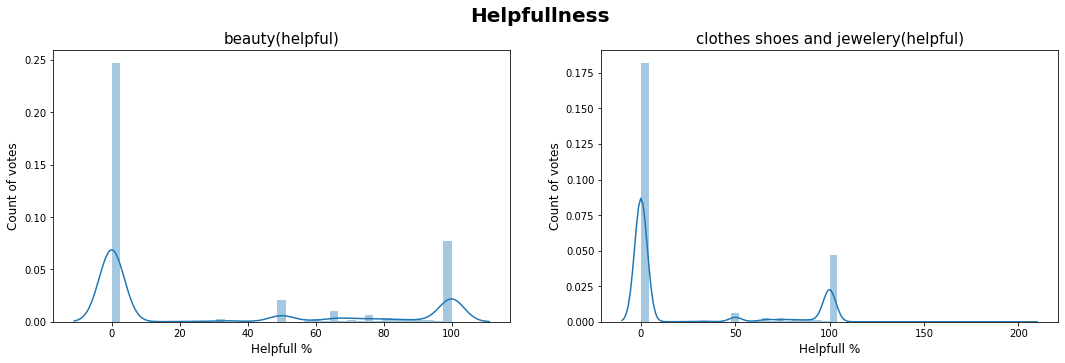

In [ ]:
List=list(enumerate([b,c]))
a=['beauty','clothes shoes and jewelery']
plt.figure(figsize=(18,5))
plt.suptitle('Helpfullness',x=0.5,y=1,fontsize=20,fontweight='bold') 
for y in List:
    plt.subplot(1,2,y[0]+1)
    sns.distplot(x=y[1]['helpful'])
    plt.title(f"{a[y[0]]}(helpful)",fontsize=15)
    plt.xlabel('Helpfull %',fontsize=12)
    plt.ylabel('Count of votes',fontsize=12)
plt.show()

From the above plot we can interpret that most of reveiws were not helpful  

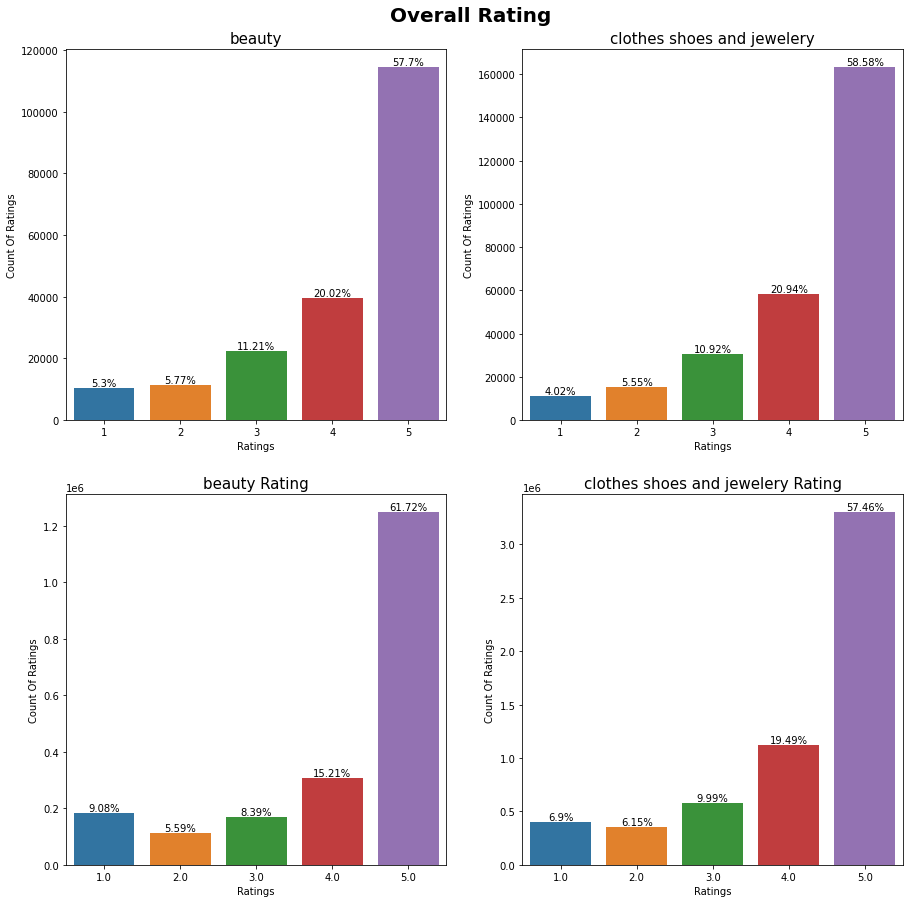

In [ ]:
List=list(enumerate([b,c,b_r,c_r]))
Len=list([len(b),len(c),len(b_r),len(c_r)])
a=['beauty','clothes shoes and jewelery','beauty Rating','clothes shoes and jewelery Rating']
plt.figure(figsize=(15,15))
plt.suptitle('Overall Rating',x=0.5,y=0.92,fontsize=20,fontweight='bold')
for y,z in zip(List,Len):
    plt.subplot(2,2,y[0]+1)
    ax=sns.countplot(x=y[1]['overall'])
    plt.title(f"{a[y[0]]}",fontsize=15)
    plt.ylabel('Count Of Ratings')
    plt.xlabel('Ratings')
    for bar in ax.patches:
      percentage=f"{round(bar.get_height()/(z)*100,2)}%"
      x=bar.get_x()+bar.get_width()/2
      y=bar.get_height()
      ax.annotate(percentage,(x,y),va="bottom",ha="center")  
plt.show()

From the above plot we can interpret that most of the reveiws were rated 5 ,followed with 4 ,3 ,2,1.

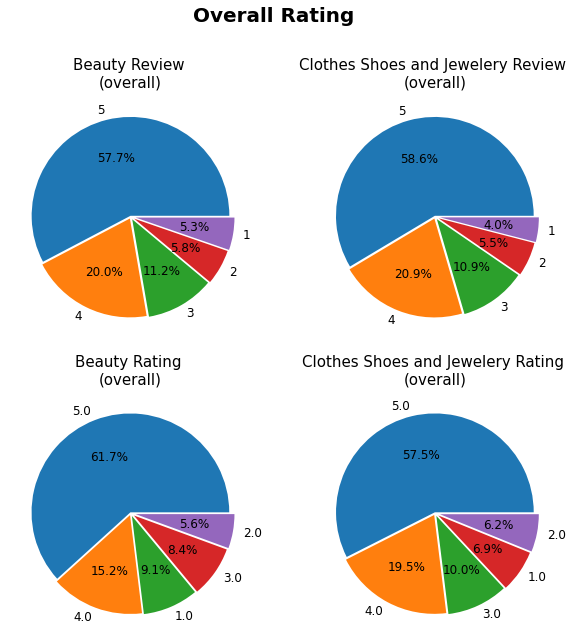

In [ ]:
List=list(enumerate([b,c,b_r,c_r]))
a=['Beauty Review','Clothes Shoes and Jewelery Review','Beauty Rating','Clothes Shoes and Jewelery Rating']
plt.figure(figsize=(10,10))
plt.suptitle('Overall Rating',x=0.5,y=1,fontsize=20,fontweight='bold')
for y in List:
    plt.subplot(2,2,y[0]+1)
    plt.pie(x=y[1]['overall'].value_counts().values,labels=y[1]['overall'].value_counts().index,autopct="%0.01f%%",explode=[0.01,0.02,0.03,0.04,0.05],textprops={'fontsize':12})
    plt.title(f"{a[y[0]]} \n(overall)",fontsize=15)  
plt.show()

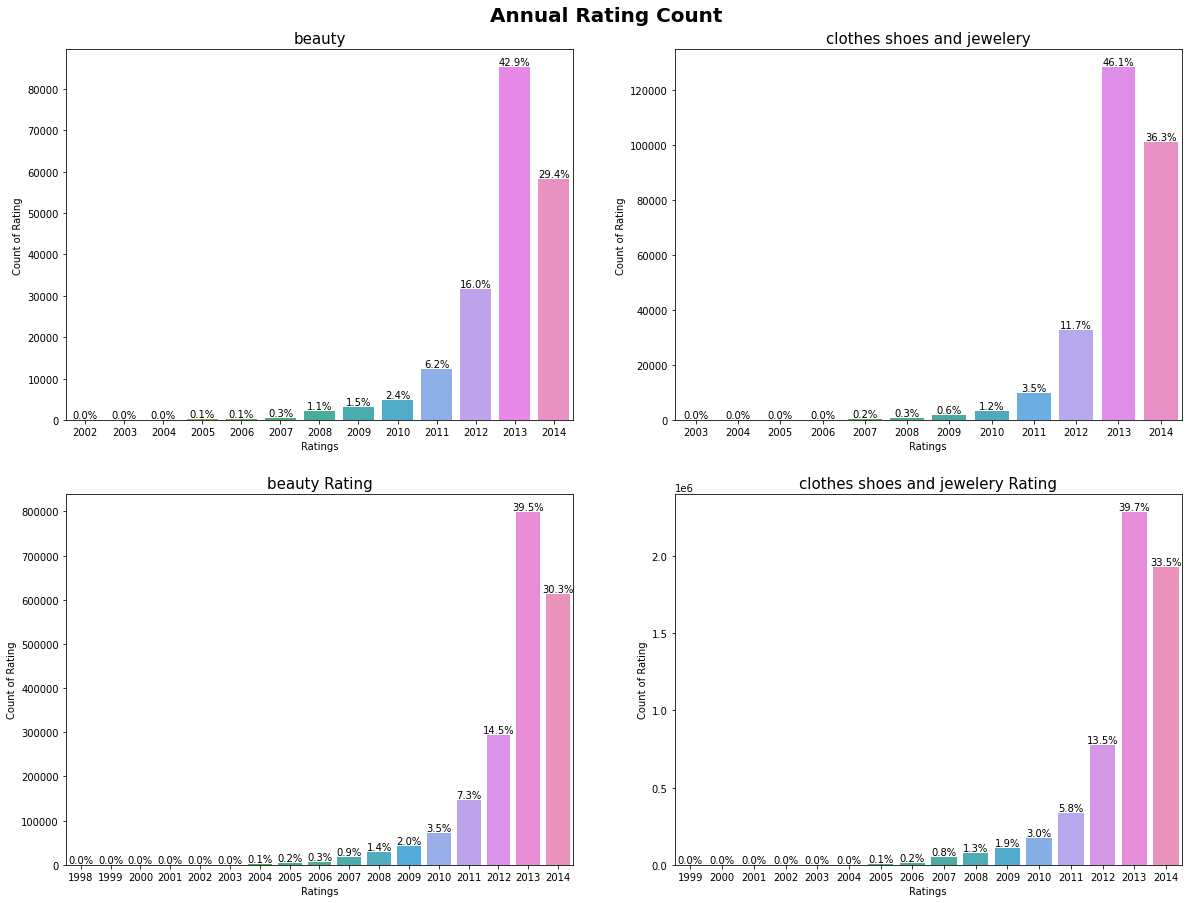

In [ ]:
List=list(enumerate([b,c,b_r,c_r]))
Len=list([len(b),len(c),len(b_r),len(c_r)])
a=['beauty','clothes shoes and jewelery','beauty Rating','clothes shoes and jewelery Rating']
plt.figure(figsize=(20,15))
plt.suptitle('Annual Rating Count',x=0.5,y=0.92,fontsize=20,fontweight='bold')
for y,z in zip(List,Len):
    plt.subplot(2,2,y[0]+1)
    ax=sns.countplot(x=y[1]['year'])
    plt.title(f"{a[y[0]]}",fontsize=15)
    plt.ylabel('Count of Rating')
    plt.xlabel('Ratings')
    for bar in ax.patches:
      percentage=f"{round(bar.get_height()/(z)*100,1)}%"
      x=bar.get_x()+bar.get_width()/2
      y=bar.get_height()
      ax.annotate(percentage,(x,y),va="bottom",ha="center")  
plt.show()

From the above plot we can interpret that most of the reveiws were wirtten in year of 2013 followed by 2014 , 2012.

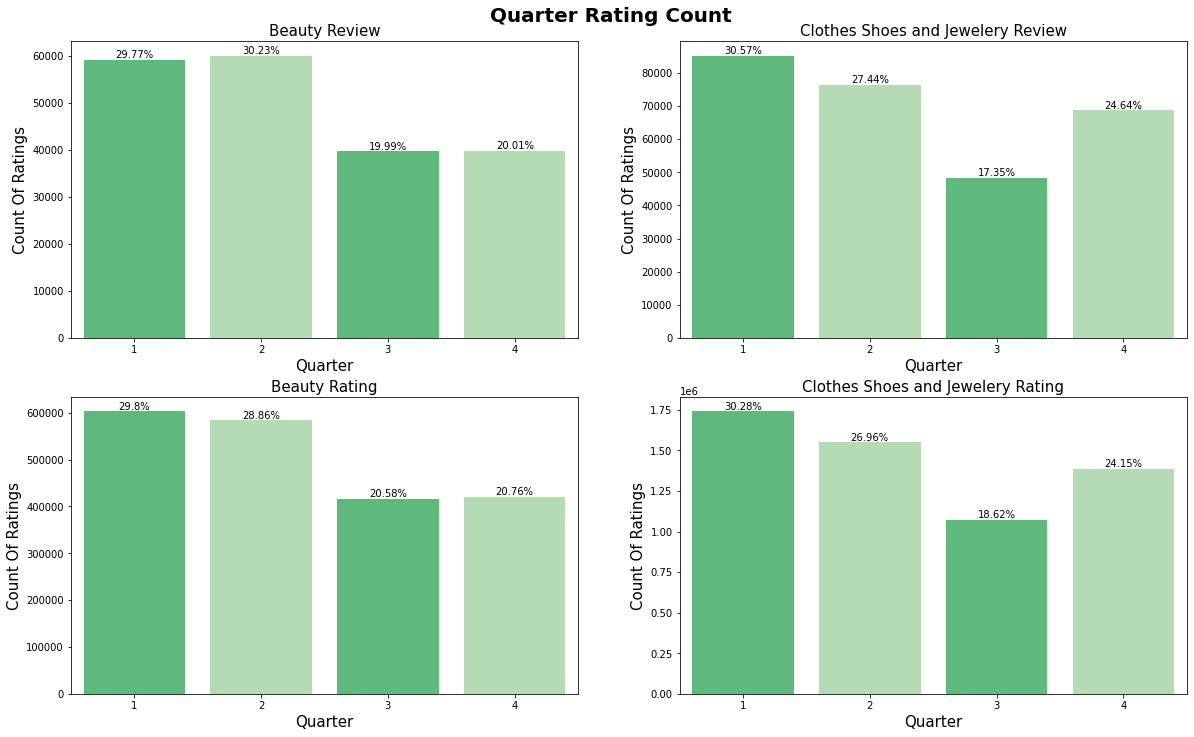

In [ ]:
List=list(enumerate([b,c,b_r,c_r]))
Len=list(enumerate([len(b),len(c),len(b_r),len(c_r)]))
a=['Beauty Review','Clothes Shoes and Jewelery Review','Beauty Rating','Clothes Shoes and Jewelery Rating']
plt.subplots(figsize= (20, 12))
plt.suptitle('Quarter Rating Count',x=0.5,y=0.92,fontsize=20,fontweight='bold')
for y,z in zip(List,Len):
  plt.subplot(2,2,y[0]+1)
  ax=sns.countplot(x=y[1]['season'],palette=['#50C878','#AFE1AF'])
  plt.title(f"{a[y[0]]}",fontsize=15) 
  plt.ylabel('Count Of Ratings',fontsize=15) 
  plt.xlabel('Quarter',fontsize=15)
  for bar in ax.patches: 
    percentage = f"{round(bar.get_height()*100 /z[1],2)}%"            
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )    
plt.show()

From the above plot we can interpret that most of the reveiws for beauty catagory were given in summer and for clothes , shoes and jewelery were given in the season of spring. 

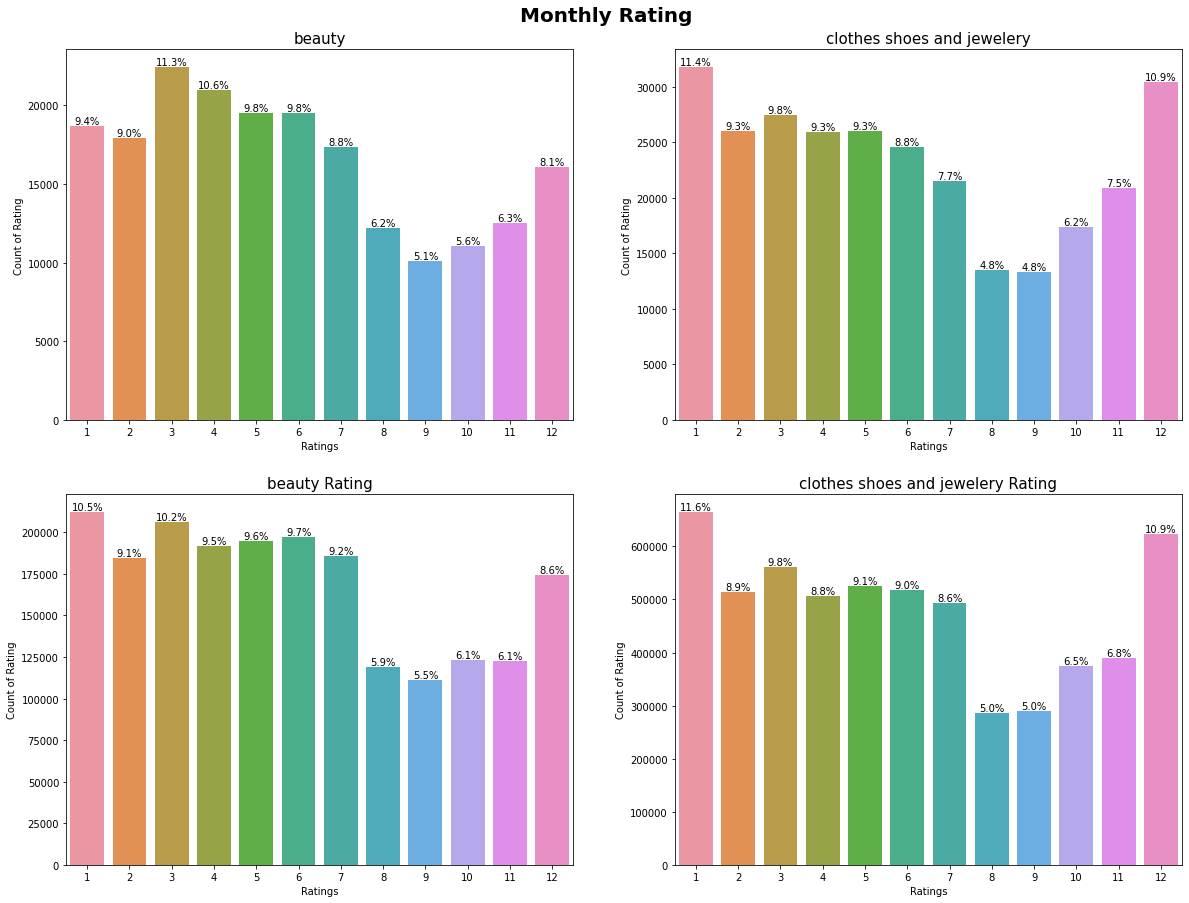

In [ ]:
List=list(enumerate([b,c,b_r,c_r]))
Len=list([len(b),len(c),len(b_r),len(c_r)])
a=['beauty','clothes shoes and jewelery','beauty Rating','clothes shoes and jewelery Rating']
plt.figure(figsize=(20,15))
plt.suptitle('Monthly Rating',x=0.5,y=0.92,fontsize=20,fontweight='bold')
for y,z in zip(List,Len):
    plt.subplot(2,2,y[0]+1)
    ax=sns.countplot(x=y[1]['month'])
    plt.title(f"{a[y[0]]}",fontsize=15)
    plt.ylabel('Count of Rating')
    plt.xlabel('Ratings')
    for bar in ax.patches:
      percentage=f"{round(bar.get_height()/(z)*100,1)}%"
      x=bar.get_x()+bar.get_width()/2
      y=bar.get_height()
      ax.annotate(percentage,(x,y),va="bottom",ha="center")  
plt.show()

From the above plot we can interpret that most of the reveiws for beauty catagory were given in the month of march and for clothes , shoes and jewelery were given in the month of january.The reveiws for beauty and for clothes , shoes and jewelery catagory were given in the month of january.  

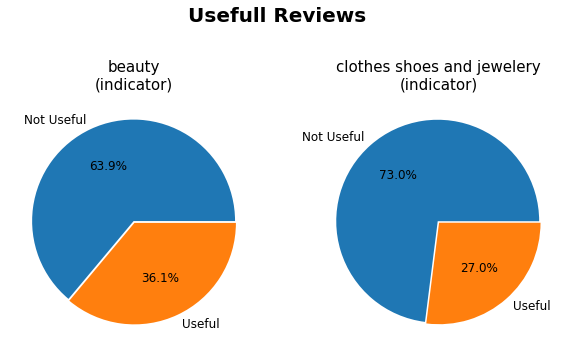

In [ ]:
List=list(enumerate([b,c]))
a=['beauty','clothes shoes and jewelery']
plt.figure(figsize=(10,5))
plt.suptitle('Usefull Reviews',x=0.5,y=1.1,fontsize=20,fontweight='bold')
for y in List:
    plt.subplot(1,2,y[0]+1)
    plt.pie(x=y[1]['indicator'].value_counts().values,labels=y[1]['indicator'].value_counts().index,autopct="%0.01f%%",explode=[0.01,0.01],textprops={'fontsize':12})
    plt.title(f"{a[y[0]]}\n(indicator)",fontsize=15)  
plt.show()

From the above plot we can interpret that most of the reveiws for beauty and for clothes , shoes and jewelery catagory were not useful. 

### Bivariate Analysis

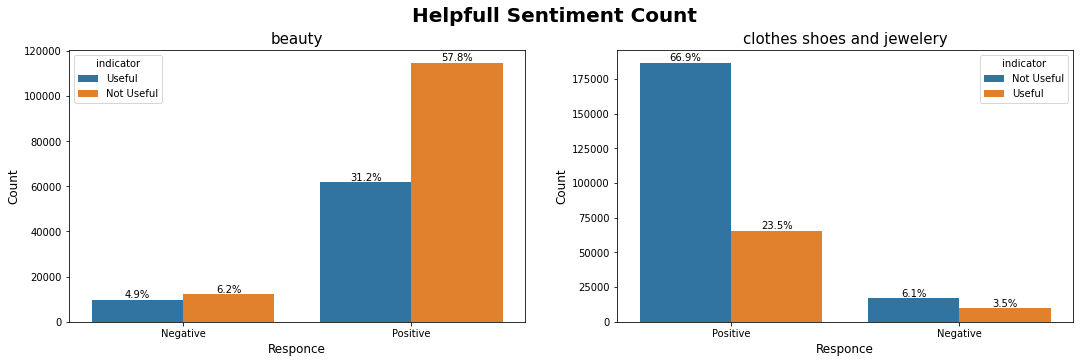

In [ ]:
List=list(enumerate([b,c]))
a=['beauty','clothes shoes and jewelery']
Len=[len(b),len(c)]
plt.figure(figsize=(18,5))
plt.suptitle('Helpfull Sentiment Count',x=0.5,y=1,fontsize=20,fontweight='bold')
for y,z in zip(List,Len):
    plt.subplot(1,2,y[0]+1)
    ax=sns.countplot(x=y[1]['responce'],hue=y[1]['indicator'])
    plt.title(f"{a[y[0]]}",fontsize=15) 
    plt.xlabel('Responce',fontsize=12) 
    plt.ylabel('Count',fontsize=12)
    for bar in ax.patches:
      percentage=f"{round(bar.get_height()/(z)*100,1)}%"
      x=bar.get_x()+bar.get_width()/2
      y=bar.get_height()
      ax.annotate(percentage,(x,y),va="bottom",ha="center")  
plt.show()

From the above plot we can interpret that most of the reveiws for beauty and for clothes , shoes and jewelery catagory were found not to be useful. 

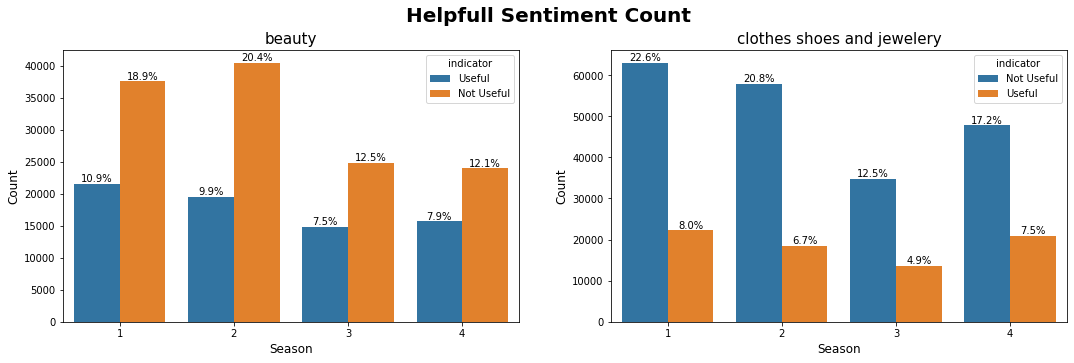

In [ ]:
List=list(enumerate([b,c]))
a=['beauty','clothes shoes and jewelery']
Len=[len(b),len(c)]
plt.figure(figsize=(18,5))
plt.suptitle('Helpfull Sentiment Count',x=0.5,y=1,fontsize=20,fontweight='bold')
for y,z in zip(List,Len):
    plt.subplot(1,2,y[0]+1)
    ax=sns.countplot(x=y[1]['season'],hue=y[1]['indicator'])
    plt.title(f"{a[y[0]]}",fontsize=15) 
    plt.xlabel('Season',fontsize=12) 
    plt.ylabel('Count',fontsize=12)
    for bar in ax.patches:
      percentage=f"{round(bar.get_height()/(z)*100,1)}%"
      x=bar.get_x()+bar.get_width()/2
      y=bar.get_height()
      ax.annotate(percentage,(x,y),va="bottom",ha="center")  
plt.show()

From the above plot we can interpret that most of the Positive and negative reveiws for beauty catagory were given in summer and for clothes , shoes and jewelery were given in the season of spring. 

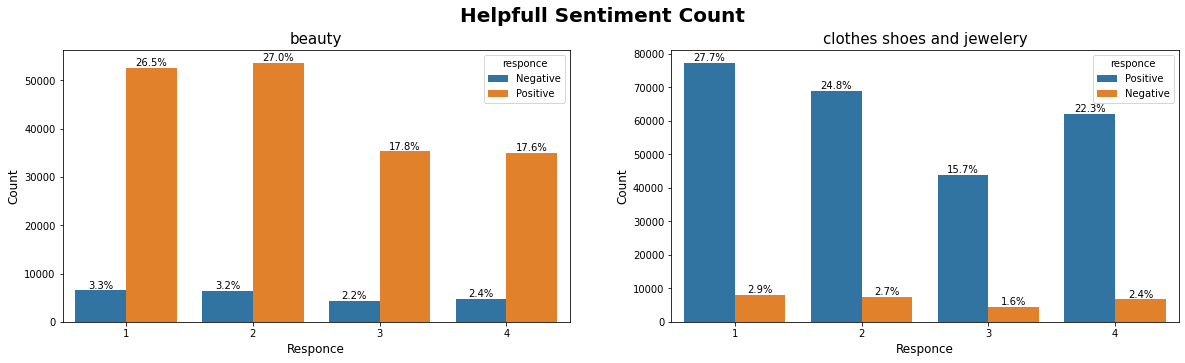

In [ ]:
List=list(enumerate([b,c]))
a=['beauty','clothes shoes and jewelery']
Len=[len(b),len(c)]
plt.figure(figsize=(20,5))
plt.suptitle('Helpfull Sentiment Count',x=0.5,y=1,fontsize=20,fontweight='bold')
for y,z in zip(List,Len):
    plt.subplot(1,2,y[0]+1)
    ax=sns.countplot(x=y[1]['season'],hue=y[1]['responce'])
    plt.title(f"{a[y[0]]}",fontsize=15) 
    plt.xlabel('Responce',fontsize=12) 
    plt.ylabel('Count',fontsize=12)
    for bar in ax.patches:
      percentage=f"{round(bar.get_height()/(z)*100,1)}%"
      x=bar.get_x()+bar.get_width()/2
      y=bar.get_height()
      ax.annotate(percentage,(x,y),va="bottom",ha="center")  
plt.show()

From the above plot we can interpret that most of the positive and negative reveiws for beauty and for clothes , shoes and jewelery catagory were given in the season of spring. 

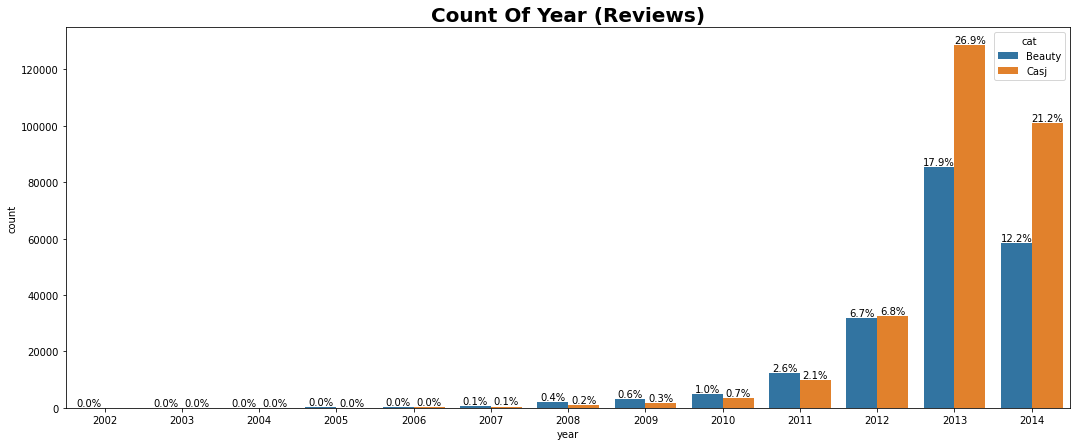

In [ ]:
fig, ax = plt.subplots(figsize = (18, 7))
ax.set_title("Count Of Year (Reviews)",fontsize=20,fontweight='bold') 
labels = list(bc["year"].value_counts().index)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Count',fontsize=12)
sns.countplot(x = bc["year"],hue=bc['cat'])
for bar in ax.patches:
    percentage=f"{round(bar.get_height()/len(bc)*100,1)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va="bottom",ha="center")
plt.show()

From the above plot we can interpret that most of the reveiws for beauty and for clothes , shoes and jewelery catagory were given in the year of 2013 and the majority of reviews were given to beauty till 2011 after 2011 majority of reveiw were given to clothes ,shoes and jewelery.   

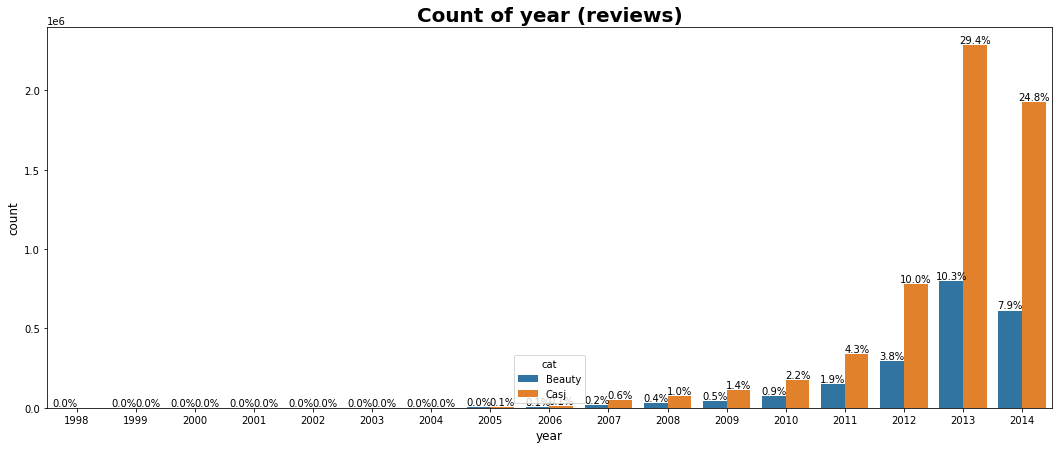

In [ ]:
fig, ax = plt.subplots(figsize = (18, 7))
ax.set_title("Count of year (reviews)",fontsize=20,fontweight='bold') 
labels = list(bc_r["year"].value_counts().index) 
plt.xlabel('Year',fontsize=12)
plt.ylabel('Count',fontsize=12)

sns.countplot(x = bc_r["year"],hue=bc_r['cat'])
for bar in ax.patches:
    percentage=f"{round(bar.get_height()/len(bc_r)*100,1)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va="bottom",ha="center")
plt.show()

From the above plot we can interpret that most of the reveiws for beauty and for clothes , shoes and jewelery catagory were given in the year of 2013 and the majority of reviews were given to clothes ,shoes and jewelery through out the years. 

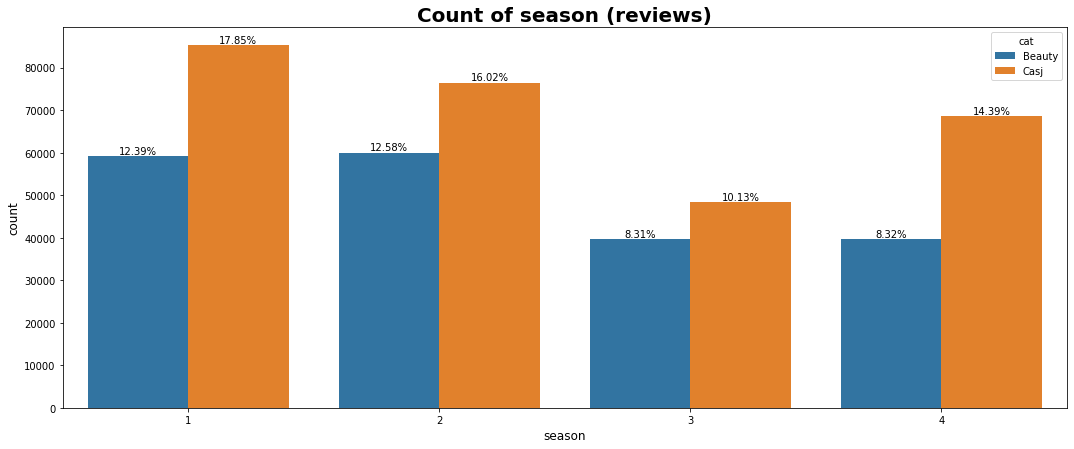

In [ ]:
fig, ax = plt.subplots(figsize = (18, 7))
ax.set_title("Count of season (reviews)",fontsize=20,fontweight='bold') 
labels = list(bc["season"].value_counts().index)
plt.xlabel('Season',fontsize=12)
plt.ylabel('Count',fontsize=12) 
sns.countplot(x = bc["season"],hue=bc['cat'])
for bar in ax.patches:
    percentage=f"{round(bar.get_height()/len(bc)*100,2)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va="bottom",ha="center")
plt.show()

the majority of reviews were given to clothes ,shoes and jewelery through out the seasons. 

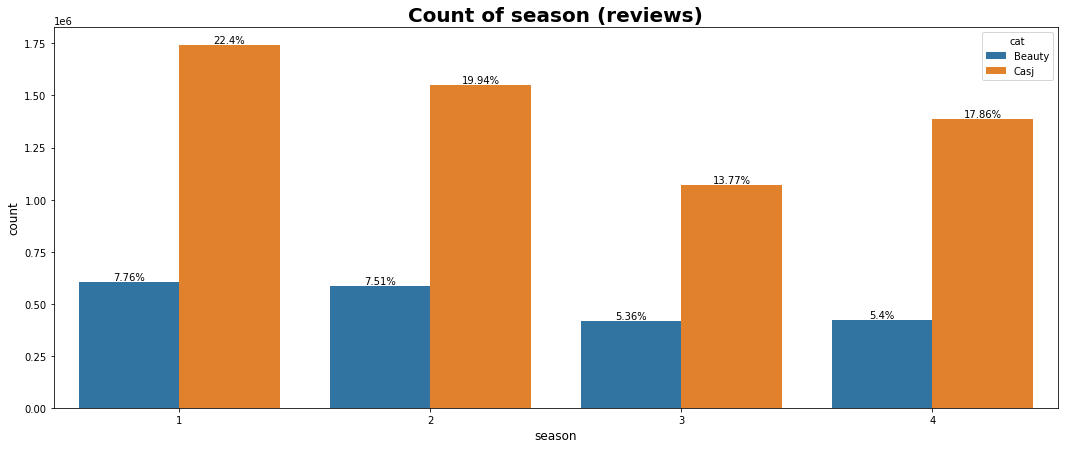

In [ ]:
fig, ax = plt.subplots(figsize = (18, 7))
ax.set_title("Count of season (reviews)",fontsize=20,fontweight='bold') 
plt.xlabel('Season',fontsize=12)
plt.ylabel('Count',fontsize=12)
labels = list(bc_r["season"].value_counts().index) 
sns.countplot(x = bc_r["season"],hue=bc_r['cat'])
for bar in ax.patches:
    percentage=f"{round(bar.get_height()/len(bc_r)*100,2)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va="bottom",ha="center")
plt.show()

the majority of reviews were given to clothes ,shoes and jewelery through out the seasons.

In [ ]:
# !pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-n14d9ych
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-n14d9ych
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=06f51a113ed5a3fb3a156725f40e8f523c7fe816051664b332e7cc337b8682f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-8mnx_yzz/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


### MultiVariate Analysis

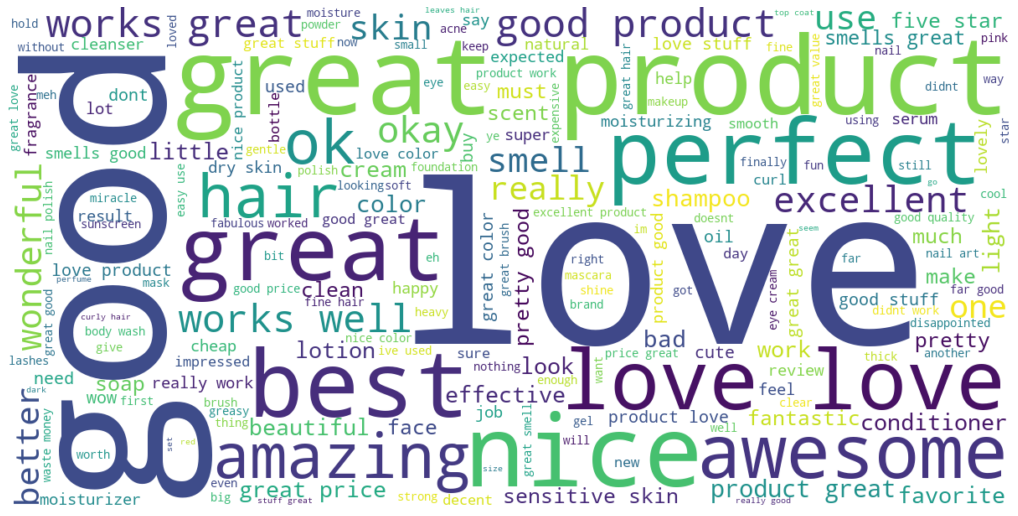

In [ ]:
from wordcloud import WordCloud
import preprocess_kgptalkie as ps

x = " ".join(review for review in b["summary"])
x = str(x).lower().replace('\\',' ').replace('_',' ').replace('.',' ')
x = ps.remove_emails(x)
x = ps.remove_rt(x)
x = ps.remove_accented_chars(x)
x = ps.remove_special_chars(x)
x = ps.remove_dups_char(x)

wordcloud = WordCloud(background_color="white", width=1200, height=600).generate(x)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

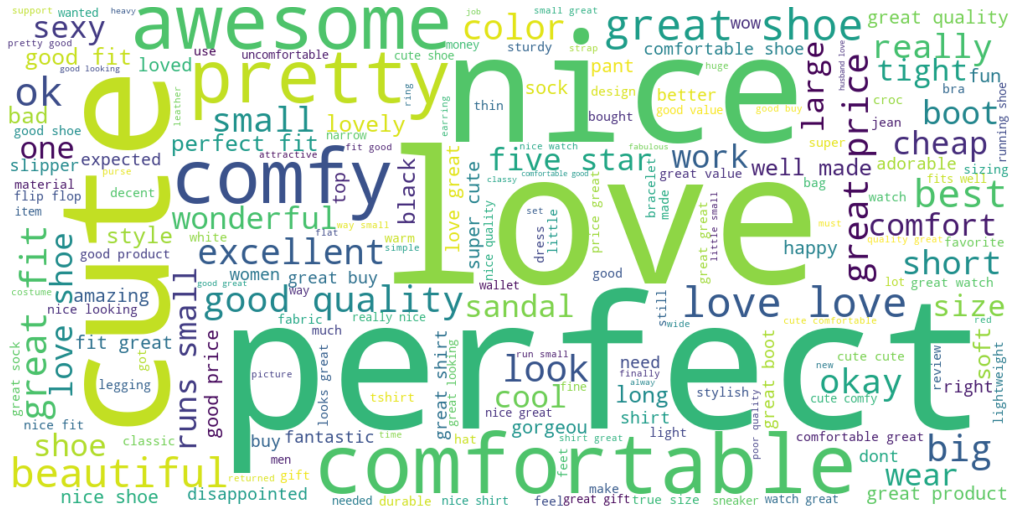

In [ ]:
x = " ".join(review for review in c["summary"])
x = str(x).lower().replace('\\',' ').replace('_',' ').replace('.',' ')
x = ps.remove_emails(x)
x = ps.remove_rt(x)
x = ps.remove_accented_chars(x)
x = ps.remove_special_chars(x)
x = ps.remove_dups_char(x)

wordcloud = WordCloud(background_color="white", width=1200, height=600).generate(x)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

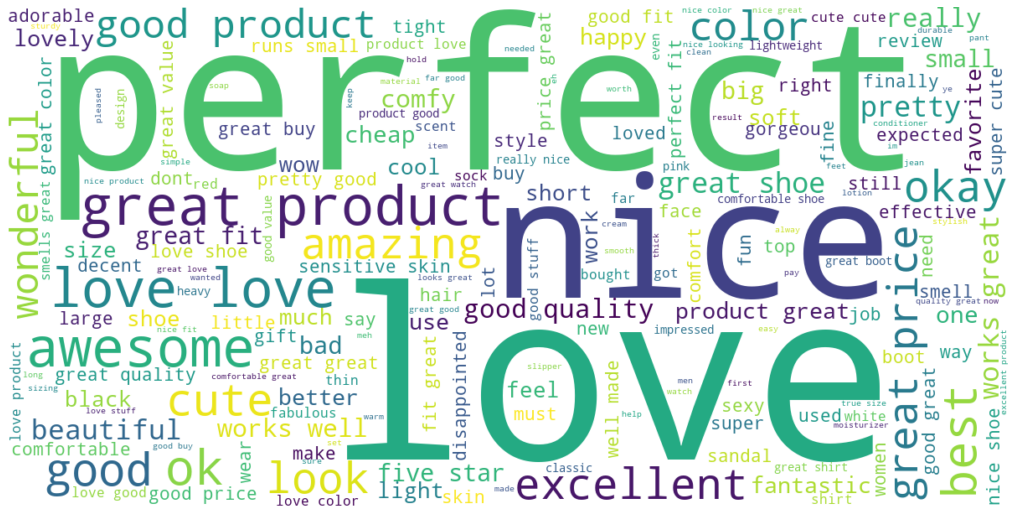

In [ ]:
x = " ".join(review for review in bc["summary"])
x = str(x).lower().replace('\\',' ').replace('_',' ').replace('.',' ')
x = ps.remove_emails(x)
x = ps.remove_rt(x)
x = ps.remove_accented_chars(x)
x = ps.remove_special_chars(x)
x = ps.remove_dups_char(x)

wordcloud = WordCloud(background_color="white", width=1200, height=600).generate(x)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()